## Dependencies and starter code

In [441]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from random import randrange

# Paths of data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combining the data into a single dataset
mouse_study_merge = pd.merge(mouse_metadata,study_results)
mouse_study_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [85]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_mean = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_study_median = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_study_variance = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_study_std = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_study_sem = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
df_calc = pd.DataFrame(mouse_study_mean)
df_calc = df_calc.rename(columns={'Tumor Volume (mm3)':'Mean'})
df_calc['Median'] = mouse_study_median
df_calc['Variance'] = mouse_study_variance
df_calc['Standard Deviation'] = mouse_study_std
df_calc['SEM'] = mouse_study_sem
df_calc

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

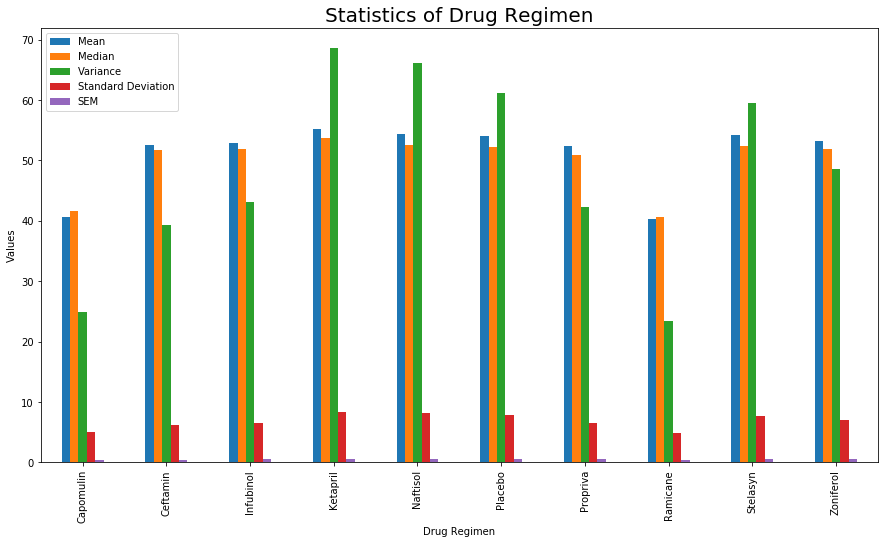

In [378]:
# Generating a bar plot showing number of data points for each treatment regimen using pandas
df_calc.plot(kind='bar',figsize=(15,8))
plt.ylabel('Values')
plt.title('Statistics of Drug Regimen', fontsize=20)
plt.show()

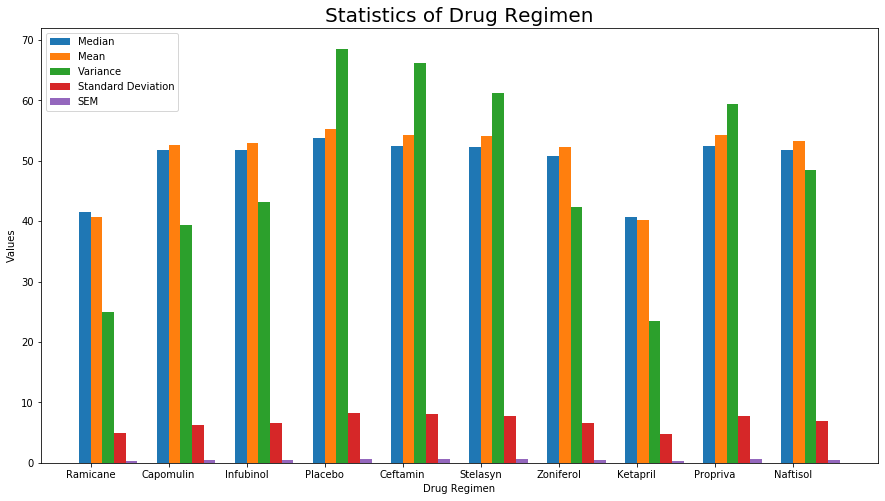

In [379]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
fig, ax = plt.subplots(figsize=(15,8))
width = .15
x = np.arange(len(mouse_study_merge['Drug Regimen'].unique())) 
ax.bar(x,df_calc['Median'],align='center',width=width,label='Median')
ax.bar(x+width,df_calc['Mean'],align='center',width=width,label='Mean')
ax.bar(x+width+width,df_calc['Variance'],align='center',width=width,label='Variance')
ax.bar(x+width+width+width,df_calc['Standard Deviation'],align='center',width=width,label='Standard Deviation')
ax.bar(x+width+width+width+width,df_calc['SEM'],align='center',width=width,label='SEM')
ax.set_xticklabels(mouse_study_merge['Drug Regimen'].unique())
ax.set_xticks(x + width / 2)
ax.legend(loc='upper left')
plt.ylabel('Values')
plt.xlabel('Drug Regimen')
plt.title('Statistics of Drug Regimen', fontsize=20)
plt.show()

## Pie plots

,Mouse ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male
...,...,...
1858,z314,Female
1860,z435,Female
1863,z581,Female
1873,z795,Female


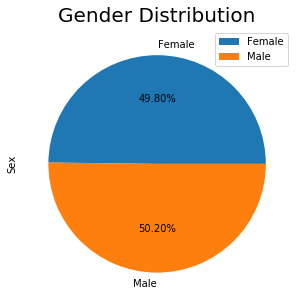

In [454]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mouse_study_merge[['Mouse ID','Sex']]
mouse_gender = mouse_study_merge[['Mouse ID','Sex']]
mouse_gender_uni = mouse_gender.drop_duplicates()
gender_count = pd.DataFrame(mouse_gender_uni.groupby('Sex')['Sex'].count())
gender_count.plot.pie(subplots=True,figsize=(5,5),autopct='%.2f%%')
plt.title('Gender Distribution', fontsize=20)
plt.show()

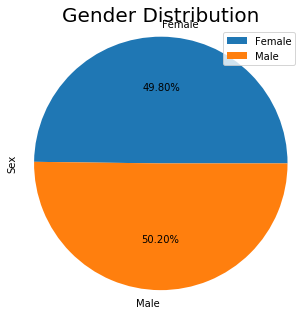

In [455]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female','Male'
fig1, ax = plt.subplots(figsize=(5,5))
ax.pie(gender_count['Sex'],autopct='%.2f%%',labels=labels)
ax.axis('equal')
ax.legend(loc='best')
plt.ylabel('Sex')
plt.title('Gender Distribution', fontsize=20)
plt.show()

## Quartiles, outliers and boxplots

In [344]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
a = mouse_study_merge[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint']]
timepoint_all = a.loc[a['Timepoint'] == 45]
timepoint_few = timepoint_all.loc[(timepoint_all['Drug Regimen'] == 'Capomulin') | (timepoint_all['Drug Regimen'] == 'Ramicane')
                      | (timepoint_all['Drug Regimen'] == 'Infubinol') | (timepoint_all['Drug Regimen'] == 'Ceftamin')]
quartiles = timepoint_few['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq 
print(f'The lower quartile of Mouse Tumor Volume is: {lowerq}')
print(f'The upper quartile of Mouse Tumor Volume is: {upperq}')
print(f'The interquartile range of Mouse Tumor Volume is: {iqr}')
print(f'The the median of Mouse Tumor Volume is: {quartiles[0.5]}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'Values below {lower_bound} could be outliers')
print(f'Values above {upper_bound} could be outliers')

The lower quartile of Mouse Tumor Volume is: 33.48002734
The upper quartile of Mouse Tumor Volume is: 62.14221369
The interquartile range of Mouse Tumor Volume is: 28.66218635
The the median of Mouse Tumor Volume is: 40.1592203
Values below -9.513252184999999 could be outliers
Values above 105.135493215 could be outliers


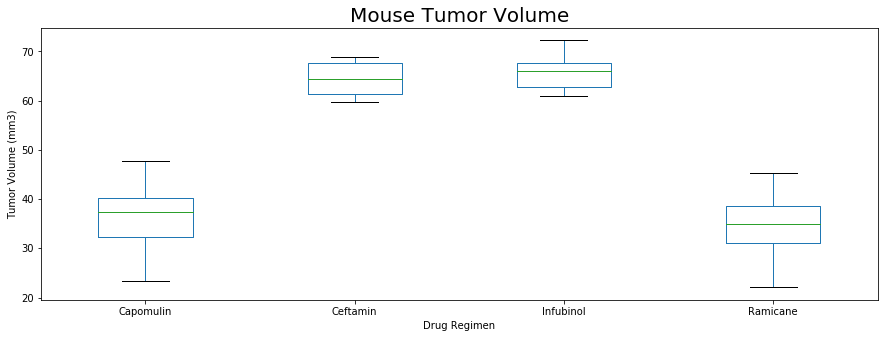

In [451]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugs_all = timepoint_few[['Drug Regimen','Tumor Volume (mm3)']]
drugs_all = drugs_all.rename(columns = {'Tumor Volume (mm3)':'value'})
mouse_vol_tot = drugs_all.assign(index = drugs_all.groupby('Drug Regimen').value.cumcount()).pivot('index','Drug Regimen','value')
mouse_vol_tot.plot.box(figsize=(15,5))
#fig.suptitle('test title', fontsize=20)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Tumor Volume', fontsize=20)
plt.show()

## Line and scatter plots

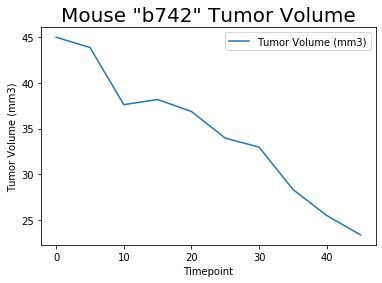

In [448]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lin_mouse = a.loc[a['Drug Regimen'] == 'Capomulin']
mouse_id = lin_mouse['Mouse ID'].unique()
n = randrange(0,len(mouse_id),1)
lin_sp = lin_mouse.loc[lin_mouse['Mouse ID'] == mouse_id[n]]
lin_sp.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse "b742" Tumor Volume', fontsize=20)
plt.show()

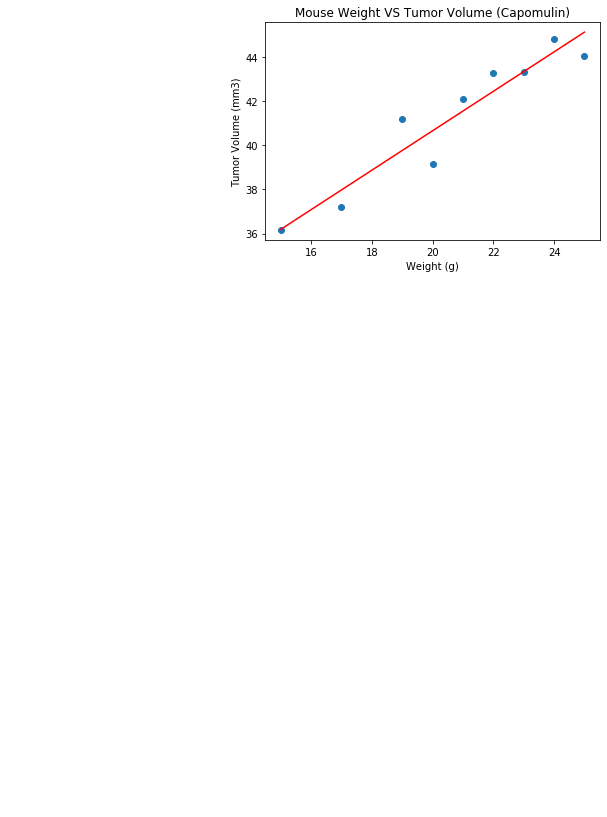

In [419]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_all = mouse_study_merge.loc[mouse_study_merge['Drug Regimen'] == 'Capomulin']
wg_vol = capomulin_all.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
wg_vol_df = pd.DataFrame(wg_vol)
wg_vol_df.reset_index(level=0, inplace=True)
x_values = wg_vol_df['Weight (g)']
y_values = wg_vol_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse Weight VS Tumor Volume (Capomulin)')
plt.show()

In [404]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(wg_vol_df['Weight (g)'],wg_vol_df['Tumor Volume (mm3)'])
print(f'The correlation between both factors is {round(correlation[0],2)}')

The correlation between both factors is 0.95
